In [1]:
!wget http://www.lawrence.edu/fast/greggj/CMSC490/diabetes.csv

--2023-09-27 16:22:32--  http://www.lawrence.edu/fast/greggj/CMSC490/diabetes.csv
Resolving www.lawrence.edu (www.lawrence.edu)... 143.44.124.14
Connecting to www.lawrence.edu (www.lawrence.edu)|143.44.124.14|:80... 

connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.lawrence.edu/fast/greggj/CMSC490/diabetes.csv [following]
--2023-09-27 16:22:32--  https://www.lawrence.edu/fast/greggj/CMSC490/diabetes.csv
Connecting to www.lawrence.edu (www.lawrence.edu)|143.44.124.14|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www7.lawrence.edu/fast/greggj/CMSC490/diabetes.csv [following]
--2023-09-27 16:22:33--  https://www7.lawrence.edu/fast/greggj/CMSC490/diabetes.csv
Resolving www7.lawrence.edu (www7.lawrence.edu)... 143.44.124.14
Connecting to www7.lawrence.edu (www7.lawrence.edu)|143.44.124.14|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.lawrence.edu/fast/greggj/CMSC490/diabetes.csv [following]
--2023-09-27 16:22:33--  https://www2.lawrence.edu/fast/greggj/CMSC490/diabetes.csv
Resolving www2.lawrence.edu (www2.lawrence.edu)... 143.44.124.14
Connecting to www2.lawre

In [2]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
rows,cols = df.shape
print(rows,cols)

520 17


In [3]:
#transform a simple categorical column with two categories into 0/1 encoding in Pandas.
df['gender'] = (df['gender'] == 'Female').astype(int)

#normalize age
# Calculate the minimum and maximum values of the data
min_age = df['age'].min()
max_age = df['age'].max()

# Apply the Min-Max normalization formula to the data
df['normalized_age'] = ((0.99 - 0.01) * (df['age'] - min_age) / (max_age - min_age)) + 0.0

In [4]:
df = df.sample(frac=1)
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,normalized_age
69,50,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,1,0.450270
33,54,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,0.503243
443,35,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0.251622
420,47,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0.410541
352,67,0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0,0.675405


In [5]:
input = df.drop(['class','age'],axis=1).to_numpy()
output = df['class'].to_numpy()
print(input.shape)
train_data = input[:416,:]
train_targets = output[:416]
test_data = input[416:,:]
test_targets = output[416:]

(520, 16)


In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [13]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [15]:
from tensorflow import keras

history = model.fit(train_data, train_targets,
              epochs=20, batch_size=40,validation_data=(test_data, test_targets))

Epoch 1/20
11/11 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9784 - val_loss: 0.1595 - val_accuracy: 0.9423
Epoch 2/20
 1/11 [=>............................] - ETA: 0s - loss: 0.0606 - accuracy: 0.9750

11/11 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9784 - val_loss: 0.1459 - val_accuracy: 0.9423
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9784 - val_loss: 0.1412 - val_accuracy: 0.9519
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9784 - val_loss: 0.1400 - val_accuracy: 0.9423
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9856 - val_loss: 0.1457 - val_accuracy: 0.9423
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.1536 - val_accuracy: 0.9423
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9856 - val_loss: 0.1442 - val_accuracy: 0.9423
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9856 - val_loss: 0.1409 - val_accuracy: 0.9423
Epoch 9/20
11/11 [=============

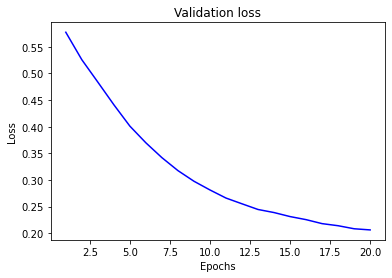

In [11]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
epochs = range(1, len(val_loss) + 1)
plt.title("Validation loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()